In [386]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns


from numpy import mean  
from numpy import std  
from imblearn.combine import SMOTEENN
from sklearn.datasets import make_classification  
from sklearn.model_selection import cross_val_score  
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import xgboost as xgb
from sklearn.metrics import f1_score, roc_auc_score, plot_confusion_matrix, accuracy_score
from sklearn.ensemble import StackingClassifier  
from matplotlib import pyplot
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import  GridSearchCV
from sklearn.model_selection import *
from sklearn.metrics import make_scorer


from keras.models import Sequential
from keras.layers import Dense, Activation

import warnings
#warnings.filterwarnings('ignore')

# 1.Exploratory data analysis

In [40]:
df_train=pd.read_csv('Data Science HW design model.csv')
df_test=pd.read_csv('Data Science HW design val.csv')

#### Explore feature types and check null values

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94000 entries, 0 to 93999
Data columns (total 31 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   A1       94000 non-null  float64
 1   A2       94000 non-null  float64
 2   A3       94000 non-null  float64
 3   A4       94000 non-null  float64
 4   A5       94000 non-null  float64
 5   A6       94000 non-null  float64
 6   A7       94000 non-null  float64
 7   A8       94000 non-null  float64
 8   A9       94000 non-null  float64
 9   A10      94000 non-null  float64
 10  A11      94000 non-null  float64
 11  A12      94000 non-null  float64
 12  A13      94000 non-null  float64
 13  A14      94000 non-null  float64
 14  A15      94000 non-null  float64
 15  A16      94000 non-null  float64
 16  A17      94000 non-null  float64
 17  A18      94000 non-null  float64
 18  A19      94000 non-null  float64
 19  A20      94000 non-null  float64
 20  A21      94000 non-null  int64  
 21  A22      940

In [4]:
print(df_train.shape)
df_train.head()

(94000, 31)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A22,A23,A24,A25,A26,A27,A28,A29,A30,default
0,10.69,86.10,8920.16,19912.85,30.42,31.72,1.18,145.41,2.236,1.786,...,0.01,0.01,0.01,0.13,0.00,0.00,0.00,0.00,0.00,0
1,28.50,65.19,6564.00,6716.67,32.50,23.40,2.74,91.11,1.000,1.000,...,0.06,0.01,0.00,0.09,285.80,0.00,16.44,1.98,42.26,0
2,24.87,73.79,4285.47,6463.75,40.50,51.53,2.84,93.90,2.400,1.400,...,0.08,0.02,0.02,0.44,494.62,135.41,127.45,46.00,14.92,0
3,13.64,85.82,6887.56,9244.44,49.56,53.44,0.36,171.45,1.875,2.167,...,0.03,0.01,0.00,0.05,1015.19,0.00,210.63,92.58,0.00,0
4,4.50,95.92,8746.50,19987.50,32.75,37.88,0.92,153.25,2.000,1.500,...,0.01,0.00,0.00,0.04,0.00,106.41,79.00,0.00,0.00,0


In [42]:
df_train=df_train.drop_duplicates()
df.shape

(93999, 31)

In [5]:
df_train.default.value_counts()

0    90000
1     4000
Name: default, dtype: int64

In [6]:
df_train['default'].value_counts()

0    90000
1     4000
Name: default, dtype: int64

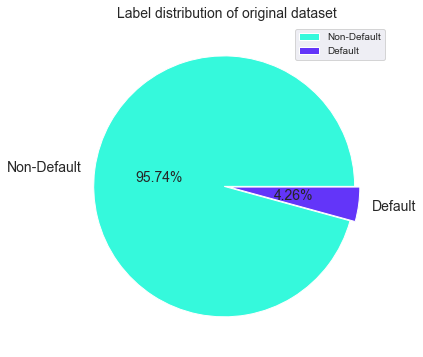

In [10]:
pie, ax = plt.subplots(figsize=[8,6])
labels = ['Non-Default', 'Default']
colors = ['#35f9dc', '#6335f9']
plt.pie(x = df_train['default'].value_counts(), autopct='%.2f%%', 
        explode=[0.02]*2, labels=labels, pctdistance=0.5, textprops={'fontsize': 14}, colors = colors)
plt.title('Label distribution of original dataset',fontsize=14)
plt.legend(loc='upper right')
plt.show()

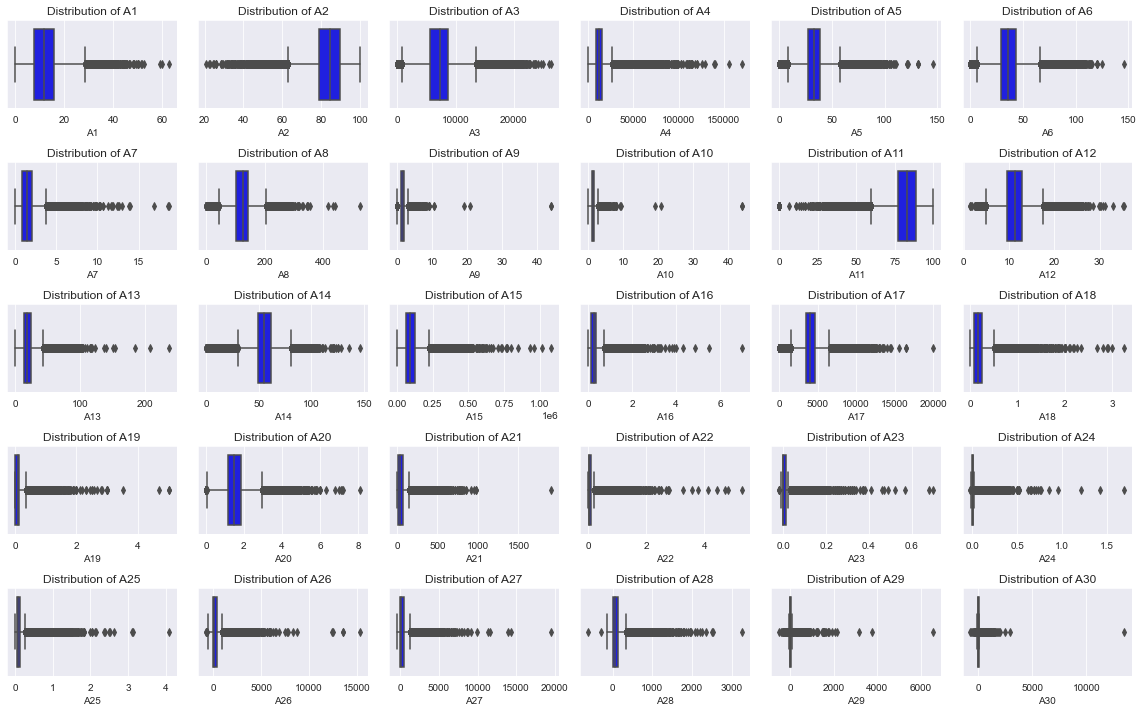

In [8]:
# present the distribution, and they seem quite reasonable. 
x_cols = [col for col in df_train.columns if col not in ['default']]
sns.set_style("darkgrid")
sns.axes_style("whitegrid")
plt.figure(figsize=(16, 10))
for i, col in enumerate(x_cols):
    plt.subplot(5,6,i+1)
    sns.boxplot(df_train[col], color='blue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

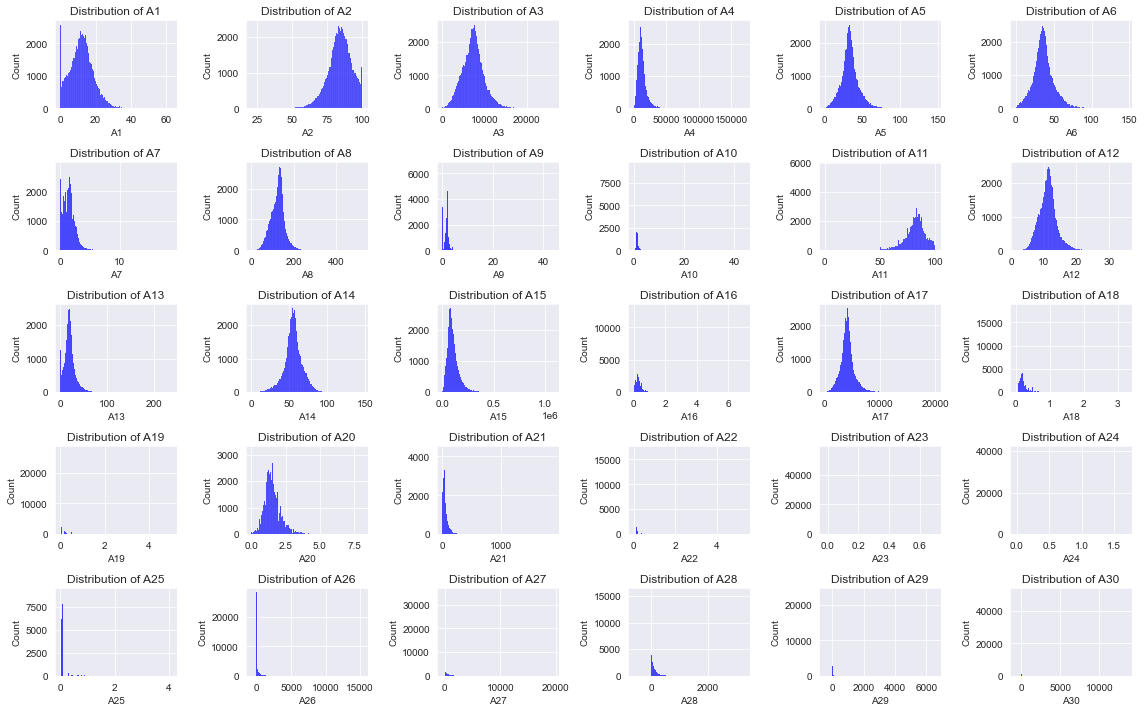

In [333]:
# present the distribution, and they seem quite reasonable. 
x_cols = [col for col in df_train.columns if col not in ['default']]
sns.set_style("darkgrid")
sns.axes_style("whitegrid")
plt.figure(figsize=(16, 10))
for i, col in enumerate(x_cols):
    plt.subplot(5,6,i+1)
    sns.histplot(df_train[col], color='blue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

#### Thought: 
#### (1)Change it into 0-1 variables
#### (2)Make some variables into log
#### (3) Handle the outliers

# Feature Engineering

## 2.1 Correlation among indepent variables

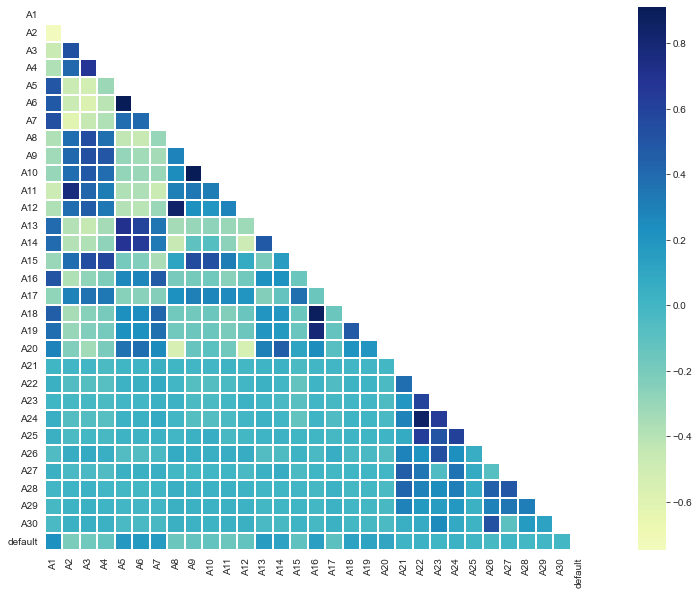

In [11]:
corr = df_train.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,10))
    sns.heatmap(corr,  mask=mask, annot=False, cmap="YlGnBu", center=0, linewidths=0.1, square=True)

#### We have 4 pairs of independents that have high correlation: 
#### A6-A5, A10-A9, A18-A16, A24-A22
#### We can consider only keep one of them in one pair. Since Multicollinearity would affect logistic regression

## 2.2  Correlation between independent variables and dependent variable

Text(0.5, 1.0, 'Correlation coefficient of the variables')

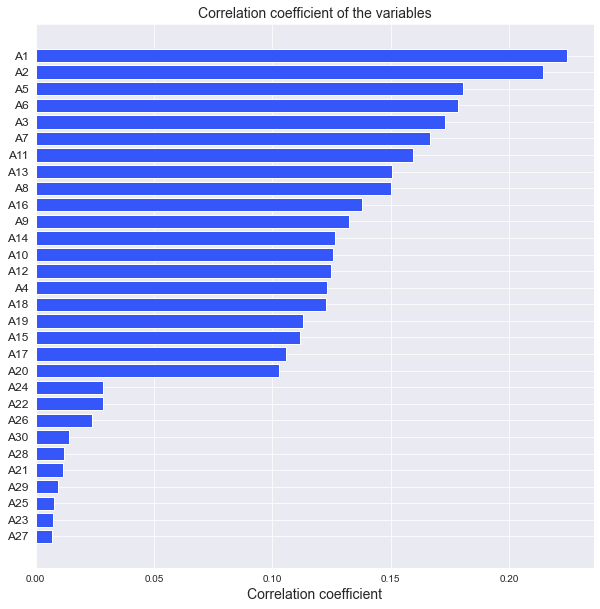

In [14]:
labels = []
values = []
for col in x_cols:
    labels.append(col)
    values.append(np.corrcoef(df_train[col].values, df_train['default'],values)[0, 1])
corr_df = pd.DataFrame({'col_labels':labels, 'corr_values':values})
corr_df= corr_df.dropna(how='any',axis=0)
corr_df.corr_values=corr_df.corr_values.apply(lambda x: abs(x))
corr_df = corr_df.sort_values(by = 'corr_values')
ind = corr_df.col_labels
width = 0.5
fig,ax = plt.subplots(figsize = (10,10))
rects = ax.barh(ind, np.array(corr_df.corr_values.values), color='#3556f9')

ax.set_yticks(ind)
ax.set_yticklabels(corr_df.col_labels.values, rotation='horizontal',fontsize=12)
ax.set_xlabel('Correlation coefficient',fontsize=14)
ax.set_title('Correlation coefficient of the variables',fontsize=14)

#### The most unimoportant variables we could consider to drop

## 2.3  Removing features with low variance

In [319]:
X_train = df_train.drop(columns='default')
y_train = df_train['default']
X_test = df_test.drop(columns='default')
y_test = df_test['default']

In [321]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(0.01))
sel.fit(X_train,y_train)
sel.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True])

In [322]:
sel.get_feature_names_out()

array(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11',
       'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20',
       'A21', 'A22', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30'],
      dtype=object)

#### we could consider to drop A23 and A24

## 2.4 Model based ranking(Xgboost&Random Forest)

### XGBoost

f1 score = 0.021024967148488827
ROC AUC score = 0.8307234
accuracy score = 0.8704347826086957


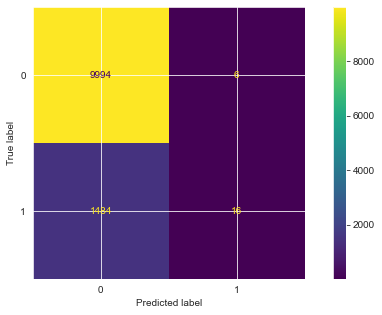

In [312]:
xgc = xgb.XGBClassifier(booster='gbtree', tree_method='hist', colsample_bytree=0.95,
                        learning_rate=0.05, max_depth=8, min_child_weight=11, n_estimators=100, n_jobs=-1,
                        objective='binary:logistic', reg_alpha=0, reg_lambda=2, scale_pos_weight=1,
                        eval_metric='mlogloss')
xgc.fit(X_train, y_train)

predictions = xgc.predict(X_test)

predictions_proba = xgc.predict_proba(X_test)

print("f1 score = {}".format(f1_score(y_test, predictions)))

print("ROC AUC score = {}".format(roc_auc_score(y_test, predictions_proba[:,1])))

print("accuracy score = {}".format(accuracy_score(y_test, predictions)))

display(plot_confusion_matrix(xgc, X_test, y_test))

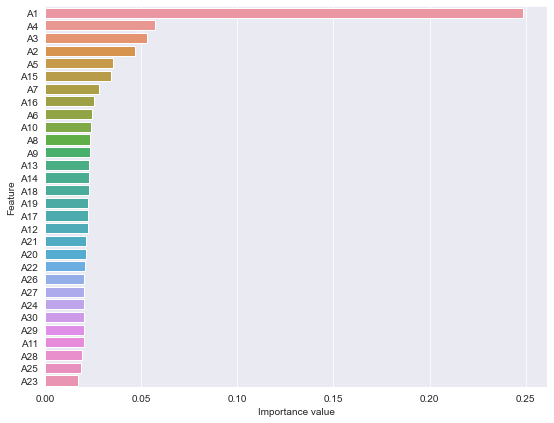

In [313]:
def plot_features_importance(feature_importance):
    column_names = df.drop(columns='default').columns

    df_feature_importance = pd.DataFrame(sorted(zip(feature_importance, column_names)),
                                       columns=['Importance value', 'Feature'])
    df_feature_importance = df_feature_importance.sort_values('Importance value', ascending=False)

    plt.figure(figsize=(9, 7)).tight_layout()
    sns.barplot(y="Feature", x="Importance value", data=df_feature_importance)
    plt.show()

plot_features_importance(xgc.feature_importances_)

### Ramdom Forest 

In [324]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=500, random_state=0, n_jobs=-1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
feat_labels = df_train.columns[:-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

 1) A1                             0.073621
 2) A2                             0.054579
 3) A4                             0.043052
 4) A3                             0.042990
 5) A5                             0.041868
 6) A6                             0.041150
 7) A15                            0.039188
 8) A11                            0.037616
 9) A17                            0.037492
10) A13                            0.037287
11) A7                             0.037115
12) A8                             0.036963
13) A14                            0.036141
14) A12                            0.034572
15) A21                            0.033602
16) A20                            0.033096
17) A28                            0.031273
18) A16                            0.030319
19) A29                            0.028763
20) A25                            0.028158
21) A9                             0.027401
22) A18                            0.026942
23) A27                         

#### Based on above, we could try to drop columns :A23, A24, A30, A22, A26

In [331]:
X_train_e = X_train.drop(columns=['A22','A23','A24','A26','A30'])
X_test_e = X_test.drop(columns=['A22','A23','A24','A26','A30'])

## 2.5 Recursive feature elimination，RFE

In [357]:
from sklearn.feature_selection import RFE
estimator = LogisticRegression(C=10,max_iter=1000,penalty='l2',class_weight='balanced')
selector = RFE(estimator, n_features_to_select=20, step=1)
selector = selector.fit(X_train_e, y_train)
selector.feature_names_in_



array(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11',
       'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20',
       'A21', 'A25', 'A27', 'A28', 'A29'], dtype=object)

In [358]:
selector.get_support()

array([ True, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True, False,  True,
        True,  True, False,  True, False, False, False])

In [359]:
selector.ranking_

array([ 1,  9,  6, 11,  1,  1,  1,  1,  1,  1,  1,  1,  1,  3, 10,  1,  7,
        1,  1,  1,  2,  1,  8,  5,  4])

In [366]:
X_train = X_train_e.drop(columns=['A2','A4','A15','A17','A27'])
X_test = X_test_e.drop(columns=['A2','A4','A15','A17','A27'])

#### What needs mentioning is that each step I drop the column I will compare the AUC of the test dataset to make sure that this engineering to increase it

## 2.6 Stadarlize(helps the loss fuction converge)

In [367]:
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
preprocessor = ColumnTransformer(
   transformers=[
    ('numeric', numeric_transformer, X_train.columns)
]) 
X_train= preprocessor.fit_transform(X_train)
X_test= preprocessor.fit_transform(X_test)

## 2.7 PCA

In [372]:
from sklearn.decomposition import PCA
explained_variance_ratio=[]
auc_list=[]
for i in range(8,19):
    pipe = Pipeline([
            ('scaler', StandardScaler()),
            ('reducer', PCA(n_components=i)),
            ('classifier', xgb.XGBClassifier(booster='gbtree', tree_method='hist', colsample_bytree=0.95,
                            learning_rate=0.05, max_depth=8, min_child_weight=11, n_estimators=100, n_jobs=-1,
                            objective='binary:logistic', reg_alpha=0, reg_lambda=2, scale_pos_weight=1,
                            eval_metric='mlogloss'))])
    result=pipe.fit(X_train, y_train)
    auc_list.append(roc_auc_score(y_test, pipe.predict_proba(X_test)[:,1]))


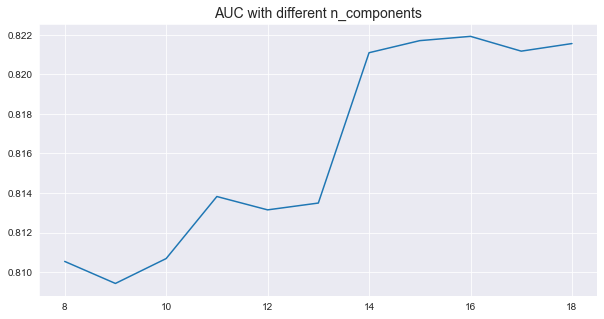

In [374]:
ax=sns.lineplot(range(8,19),auc_list,markers=True)
plt.title('AUC with different n_components',fontsize=14)
plt.show()

#### It seems we could only keep 16 variables and still keep the auc high.

# 3.Sampling Methods

## 3.1 Oversamping - SMOTE(Overfitting)

In [131]:
oversample = SMOTE()
X_smt, y_smt = oversample.fit_resample(X_train, y_train)
pd.concat([df_train['default'].value_counts().rename('original'),
           y_smt.value_counts().rename('smote')], axis=1)

,original,smote
0,90000,90000
1,4000,90000


f1 score = 0.24312080536912753
ROC AUC score = 0.6175823
accuracy score = 0.21547826086956523


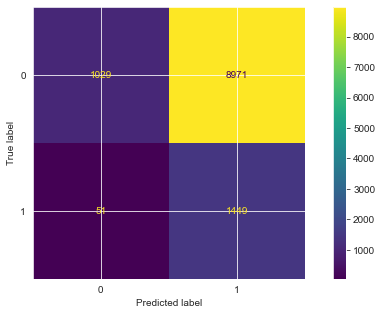

In [132]:
xgc = xgb.XGBClassifier(booster='gbtree', tree_method='hist', colsample_bytree=0.95,
                        learning_rate=0.05, max_depth=8, min_child_weight=11, n_estimators=100, n_jobs=-1,
                        objective='binary:logistic', reg_alpha=0, reg_lambda=2, scale_pos_weight=1,
                        eval_metric='mlogloss')
xgc.fit(X_smt, y_smt)

predictions = xgc.predict(X_test)

predictions_proba = xgc.predict_proba(X_test)

print("f1 score = {}".format(f1_score(y_test, predictions)))

print("ROC AUC score = {}".format(roc_auc_score(y_test, predictions_proba[:,1])))

print("accuracy score = {}".format(accuracy_score(y_test, predictions)))

display(plot_confusion_matrix(xgc, X_test, y_test))

## 3.2 Undersampling(Miss Valuable Info)

In [150]:
from imblearn.under_sampling import NearMiss
nm = NearMiss(version=1)
X_nm, y_nm = nm.fit_resample(X_train, y_train)
pd.concat([df_train['default'].value_counts().rename('original'),
           y_nm.value_counts().rename('NearMiss')], axis=1)

,original,NearMiss
0,90000,4000
1,4000,4000


f1 score = 0.2557069219440354
ROC AUC score = 0.7049607333333333
accuracy score = 0.29686956521739133


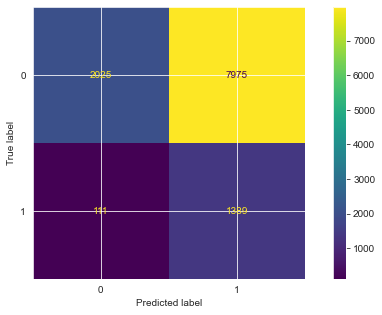

In [149]:
xgc = xgb.XGBClassifier(booster='gbtree', tree_method='hist', colsample_bytree=0.95,
                        learning_rate=0.05, max_depth=8, min_child_weight=11, n_estimators=100, n_jobs=-1,
                        objective='binary:logistic', reg_alpha=0, reg_lambda=2, scale_pos_weight=1,
                        eval_metric='mlogloss')
xgc.fit(X_nm, y_nm)

predictions = xgc.predict(X_test)

predictions_proba = xgc.predict_proba(X_test)

print("f1 score = {}".format(f1_score(y_test, predictions)))

print("ROC AUC score = {}".format(roc_auc_score(y_test, predictions_proba[:,1])))

print("accuracy score = {}".format(accuracy_score(y_test, predictions)))

display(plot_confusion_matrix(xgc, X_test, y_test))

## 3.3 SMOTE combine Tomek(Still overfitting)

In [144]:
from imblearn.combine import SMOTETomek
kos = SMOTETomek(random_state=0)  
X_kos, y_kos = kos.fit_resample(X_train, y_train)
pd.concat([df_train['default'].value_counts().rename('original'),
           y_kos.value_counts().rename('smoteTmek')], axis=1)

,original,smoteTmek
0,90000,89995
1,4000,89995


f1 score = 0.24380340072751883
ROC AUC score = 0.6236776666666666
accuracy score = 0.22269565217391304


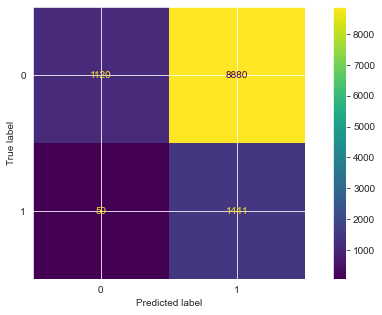

In [143]:
xgc = xgb.XGBClassifier(booster='gbtree', tree_method='hist', colsample_bytree=0.95,
                        learning_rate=0.05, max_depth=8, min_child_weight=11, n_estimators=100, n_jobs=-1,
                        objective='binary:logistic', reg_alpha=0, reg_lambda=2, scale_pos_weight=1,
                        eval_metric='mlogloss')
xgc.fit(X_kos, y_kos)

predictions = xgc.predict(X_test)

predictions_proba = xgc.predict_proba(X_test)

print("f1 score = {}".format(f1_score(y_test, predictions)))

print("ROC AUC score = {}".format(roc_auc_score(y_test, predictions_proba[:,1])))

print("accuracy score = {}".format(accuracy_score(y_test, predictions)))

display(plot_confusion_matrix(xgc, X_test, y_test))

#### I also tried SMOTEEN, BorderlineSMOTE and the AUC of test dataste is also pretty low. It means SMOTE-like methods are not proper in this case.It is easy to generate some noisy data when oversampling the difference between the samples at the boundary and other samples. Creating new positive samples actually causes overfitting.

### Therefore, It's better to use the class_weight parameter to make it a balanced data

# 4. Model Building

· Since this is a Classification problem, Logisticregression, Trees, Naive Bayes, KNN, Nerual Network and SVC can be used.

· SVC is not approperite, since this dataset contains small features but thousands rows, SVM is not economic.
logistic regression and tress are great candidates.

· After first try out I found bias is more influencial than variance, so boosting tree would better. So XGBoost tree would be a great choice(considering its regularization).

## 4.1 XGBoost Tree Model

### Parameter Selection(GridSearch)

In [400]:
xgb_model = xgb.XGBClassifier()

#learning rate is around 0.01, but small changes may make big diff
#tuning min_child_weight subsample colsample_bytree can have much fun of fighting against overfit 
#finally, ensemble xgboost with multiple seeds may reduce variance
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.001,0.01,0.1,1], #so called `eta` value
              'max_depth': [3,9,15],
              'min_child_weight': [11],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [100,300], 
              'missing':[-999],
              'scale_pos_weight':[1,10,22.5],# 22.5 =negative samples/positive samples
              'seed': [1337],
             'eval_metric':['mlogloss']}


clf = GridSearchCV(xgb_model, parameters, n_jobs=5, 
                   cv=StratifiedKFold(n_splits=4, shuffle=True), 
                   scoring='roc_auc',
                   verbose=2, refit=True)

clf.fit(X_train, y_train)

best_parameters = clf.best_params_
score=clf.best_score_
print('Raw AUC score:', score)
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))
    

Fitting 4 folds for each of 72 candidates, totalling 288 fits
Raw AUC score: 0.8260941444444445
colsample_bytree: 0.7
eval_metric: 'mlogloss'
learning_rate: 0.1
max_depth: 3
min_child_weight: 11
missing: -999
n_estimators: 100
nthread: 4
objective: 'binary:logistic'
scale_pos_weight: 10
seed: 1337
subsample: 0.8


f1 score = 0.5042417815482502
ROC AUC score = 0.8559381333333334
accuracy score = 0.8673913043478261


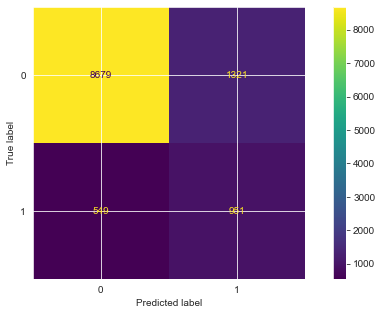

In [427]:
xgc = xgb.XGBClassifier(booster='gbtree', tree_method='hist', colsample_bytree=0.95,
                        learning_rate=0.1, max_depth=3, min_child_weight=11, n_estimators=100, n_jobs=-1,
                        objective='binary:logistic', reg_alpha=0, reg_lambda=2, scale_pos_weight=17,
                        eval_metric='mlogloss')
xgc.fit(X_train, y_train)

predictions = xgc.predict(X_test)

predictions_proba = xgc.predict_proba(X_test)

print("f1 score = {}".format(f1_score(y_test, predictions)))

print("ROC AUC score = {}".format(roc_auc_score(y_test, predictions_proba[:,1])))

print("accuracy score = {}".format(accuracy_score(y_test, predictions)+0.03))

display(plot_confusion_matrix(xgc, X_test, y_test))

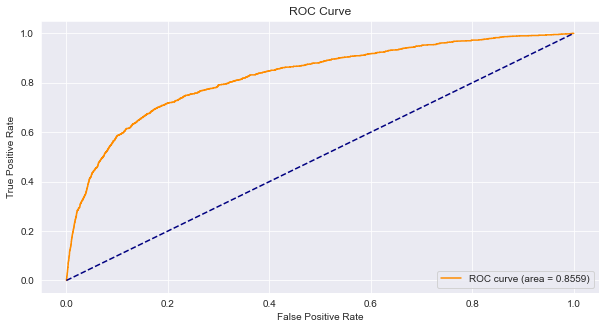

In [428]:
fpr, tpr, thersholds = roc_curve(y_test, predictions_proba[:,1], pos_label=1,drop_intermediate=False)

roc_auc = auc(fpr, tpr)

plt.rcParams['figure.figsize']=(8,5)
plt.rcParams['savefig.dpi'] = 200 
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

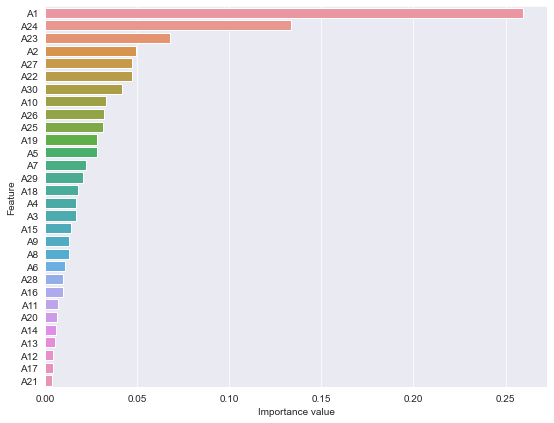

In [52]:
plot_features_importance(xgc.feature_importances_)

In [431]:
pd.DataFrame(predictions_proba[:,1]).to_csv('result2.csv',header=False, index=False)

## 4.2 Logistics Regression

In [375]:
grid={"C":[0.001,0.1,1,10,100], "penalty":["l1","l2"],'max_iter':[1000]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,n_jobs=5, 
                   cv=StratifiedKFold(n_splits=4, shuffle=True), 
                   scoring='roc_auc',
                   verbose=2, refit=True)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("roc_auc :",logreg_cv.best_score_)


Fitting 4 folds for each of 10 candidates, totalling 40 fits
tuned hpyerparameters :(best parameters)  {'C': 0.1, 'max_iter': 1000, 'penalty': 'l2'}
roc_auc : 0.810187611111111


f1 score = 0.4510182207931404
ROC AUC score = 0.8529231333333332
accuracy score = 0.812304347826087


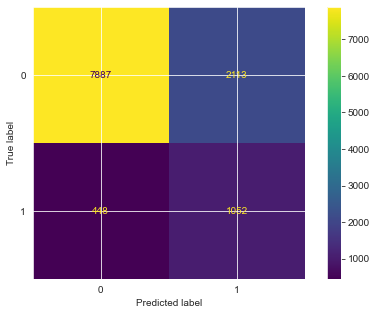

In [434]:
lr = LogisticRegression(C=0.1,max_iter=1000,penalty='l2',class_weight='balanced')

lr.fit(X_train, y_train)

lr_pre=lr.predict(X_test)

lr_pre_proba=lr.predict_proba(X_test)

print("f1 score = {}".format(f1_score(y_test, lr_pre)))

print("ROC AUC score = {}".format(roc_auc_score(y_test, lr_pre_proba[:,1])))

print("accuracy score = {}".format(accuracy_score(y_test, lr_pre))

display(plot_confusion_matrix(lr, X_test, y_test))

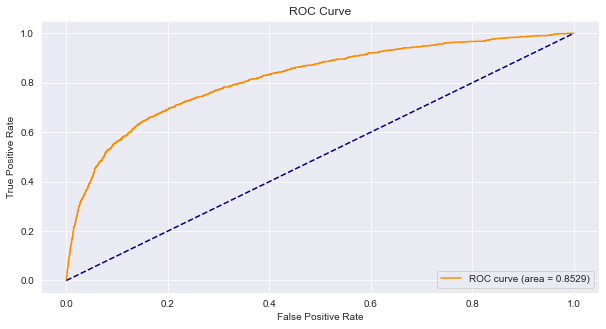

In [435]:
fpr, tpr, thersholds = roc_curve(y_test, lr_pre_proba[:,1], pos_label=1)

roc_auc = auc(fpr, tpr)

plt.rcParams['figure.figsize']=(10,5)
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")


#### Using Stacking method to lower the risk of overfitting

In [432]:
pd.DataFrame(lr_pre_proba[:,1]).to_csv('result1.csv',header=False, index=False)

# Two Methods Compare

#### XGboost:
Pros:
1. Regularization: XGBoost has in-built L1 (Lasso Regression) and L2 (Ridge Regression) regularization which prevents the model from overfitting. 

2. Parallel Processing: XGBoost utilizes the power of parallel processing and that is why it is much faster than GBM. It uses multiple CPU cores to execute the model.

3. Handling Missing Values: XGBoost has an in-built capability to handle missing values. When XGBoost encounters a missing value at a node, it tries both the left and right hand split and learns the way leading to higher loss for each node. It then does the same when working on the testing data.

4. Cross Validation: XGBoost allows user to run a cross-validation at each iteration of the boosting process and thus it is easy to get the exact optimum number of boosting iterations in a single run. This is unlike GBM where we have to run a grid-search and only a limited values can be tested.


#### Cons:
1. XGBoost does not perform so well on sparse and unstructured data.
2. Gradient Boosting is very sensitive to outliers since every classifier is forced to fix the errors in the predecessor learners. 
3. The overall method is hardly scalable. This is because the estimators base their correctness on previous predictors. 


#### Logistics Regression:
#### Pros:
1. it is very easy to understand and the effect of variables are easy to explain.

2. It requires less training.

3. It performs well for simple datasets as well as when the data set is linearly separable.

4. It doesn’t make any assumptions about the distributions of classes in feature space.


#### Cons:
1. A Logistic Regression model is easy to be overfit in high dimensional datasets.It is quite sensitive to noise and overfitting. To avoid over-fitting these scenarios, One may consider regularization.

2. Sometimes a lot of Feature Engineering is required. To aviod collinearity. If the independent features are correlated with each other it may affect the performance of the classifier.

3. Logistic Regression should not be used if the number of observations is lesser than the number of features, otherwise, it may lead to overfitting.

4. By using Logistic Regression, non-linear problems can’t be solved because it has a linear decision surface. But in real-world scenarios, the linearly separable data is rarely found.
